# Continuous Control

---

Congratulations for completing the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program!  In this notebook, you will learn how to control an agent in a more challenging environment, where the goal is to train a creature with four arms to walk forward.  **Note that this exercise is optional!**

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Crawler.app"`
- **Windows** (x86): `"path/to/Crawler_Windows_x86/Crawler.exe"`
- **Windows** (x86_64): `"path/to/Crawler_Windows_x86_64/Crawler.exe"`
- **Linux** (x86): `"path/to/Crawler_Linux/Crawler.x86"`
- **Linux** (x86_64): `"path/to/Crawler_Linux/Crawler.x86_64"`
- **Linux** (x86, headless): `"path/to/Crawler_Linux_NoVis/Crawler.x86"`
- **Linux** (x86_64, headless): `"path/to/Crawler_Linux_NoVis/Crawler.x86_64"`

For instance, if you are using a Mac, then you downloaded `Crawler.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Crawler.app")
```

In [ ]:
env = UnityEnvironment(file_name='./app/Crawler.app')

Mono path[0] = '/Users/dmitrimanajev/Dev_Code/Udacity/Deep_Reinforcement2/control_reacher/app/Crawler.app/Contents/Resources/Data/Managed'
Mono config path = '/Users/dmitrimanajev/Dev_Code/Udacity/Deep_Reinforcement2/control_reacher/app/Crawler.app/Contents/MonoBleedingEdge/etc'


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment


# Try a different worker ID (sometimes there's a stale connection)
env = UnityEnvironment(file_name='./app/Crawler.app', worker_id=2, no_graphics=True)

brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)
# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))

Mono path[0] = '/Users/dmitrimanajev/Dev_Code/Udacity/Deep_Reinforcement2/control_reacher/app/Crawler.app/Contents/Resources/Data/Managed'
Mono config path = '/Users/dmitrimanajev/Dev_Code/Udacity/Deep_Reinforcement2/control_reacher/app/Crawler.app/Contents/MonoBleedingEdge/etc'


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: CrawlerBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 129
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 20
        Vector Action descriptions: , , , , , , , , , , , , , , , , , , , 


Number of agents: 12
Size of each action: 20
There are 12 agents. Each observes a state with length: 129


### 5. Train the Agent with TD3

In [2]:
from rl_algo.td3_agent import Agent as TD3Agent
from utils.crawler_train import train_agent

td3Agent = TD3Agent(state_size=state_size, 
                    action_size=action_size, 
                    exploration_noise=0.2, 
                    lr_actor=3e-4, 
                    lr_critic=3e-4,
                    skip_steps=1,
                    update_times=3,
                    gamma=0.99,
                    learning_starts=20000)

reward_hist, survival_hist = train_agent(env, td3Agent, 
                                         num_agents=num_agents, 
                                         total_steps=1500000,
                                         save_name='td3_crawler_expl0.2')

--------------------------------------------------
TD3 Agent Parameters:
--------------------------------------------------
State Size:            129
Action Size:           20
Random Seed:           None
--------------------------------------------------
Learning Parameters:
Buffer Size:           1000000
Batch Size:            256
Gamma (Discount):      0.99
Tau (Soft Update):     0.005
Actor LR:              0.0003
Critic LR:             0.0003
Exploration Noise:     0.2
Target Policy Noise:   0.2
Target Noise Clip:     0.5
Policy Frequency:      2
Skip Steps:            1
Update Times:          3
Learning Starts:       20000 steps
--------------------------------------------------
Episode   1(   3524) | Avg-100: -4.31 | Score: -4.31 (-33.77 ; 41.96) | Length: 293.7 (83.0 ; 785.0) | Avg-1000L: 293.7
Episode   2(   6479) | Avg-100: -1.81 | Score: 0.70 (-56.24 ; 35.12) | Length: 246.2 (8.0 ; 801.0) | Avg-1000L: 270.0
Episode   3(   8047) | Avg-100: -0.76 | Score: 1.35 (-23.51 ; 36.65)

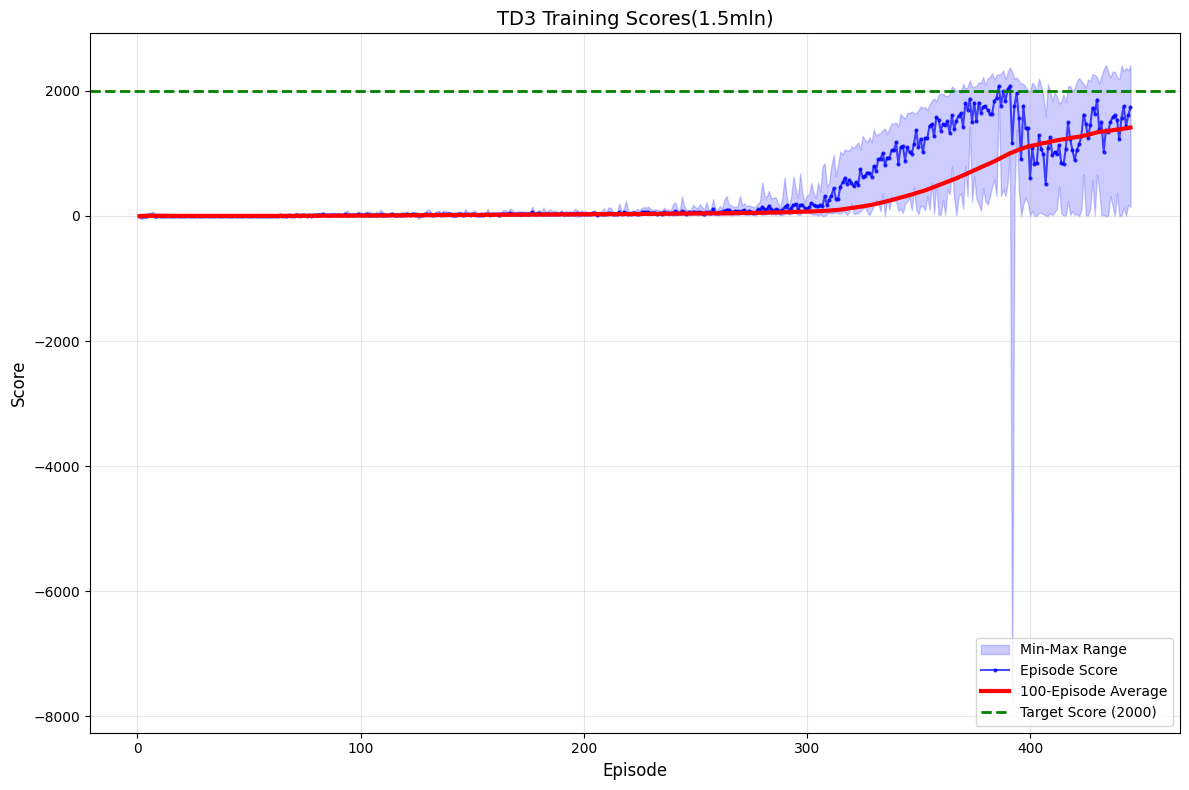

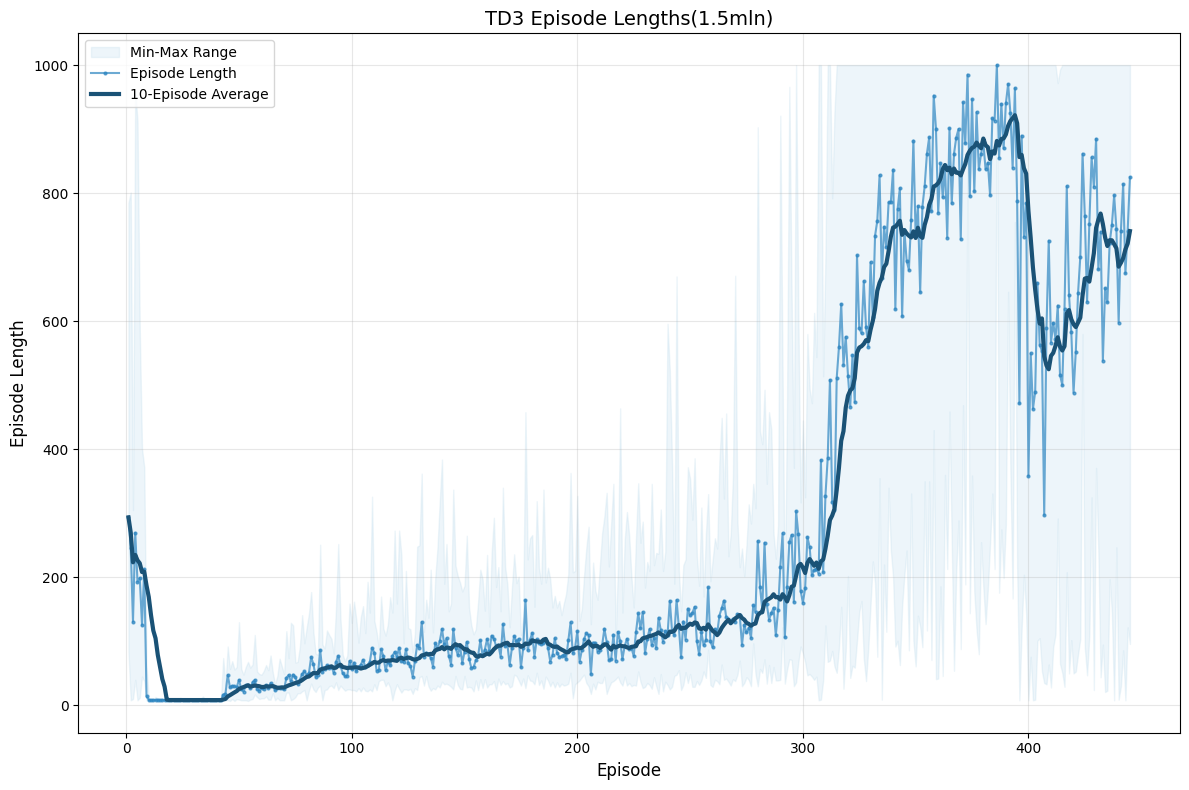

In [ ]:
from utils.plotting import plot_scores, plot_episode_lengths
import matplotlib.pyplot as plt
import numpy as np

reward_hist = np.load('./data/td3_crawler_expl02_reward_1.5mln.npy')
survival_hist = np.load('./data/td3_crawler_expl02_length_1.5mln.npy')

fig = plot_scores(reward_hist, target_score=2000, window_size=100,
                  title='TD3 Training Scores(1.5mln steps)')
fig = plot_episode_lengths(survival_hist, window_size=10,
                           title='TD3 Episode Lengths(1.5mln steps)')




#### SAC Algorithm Results

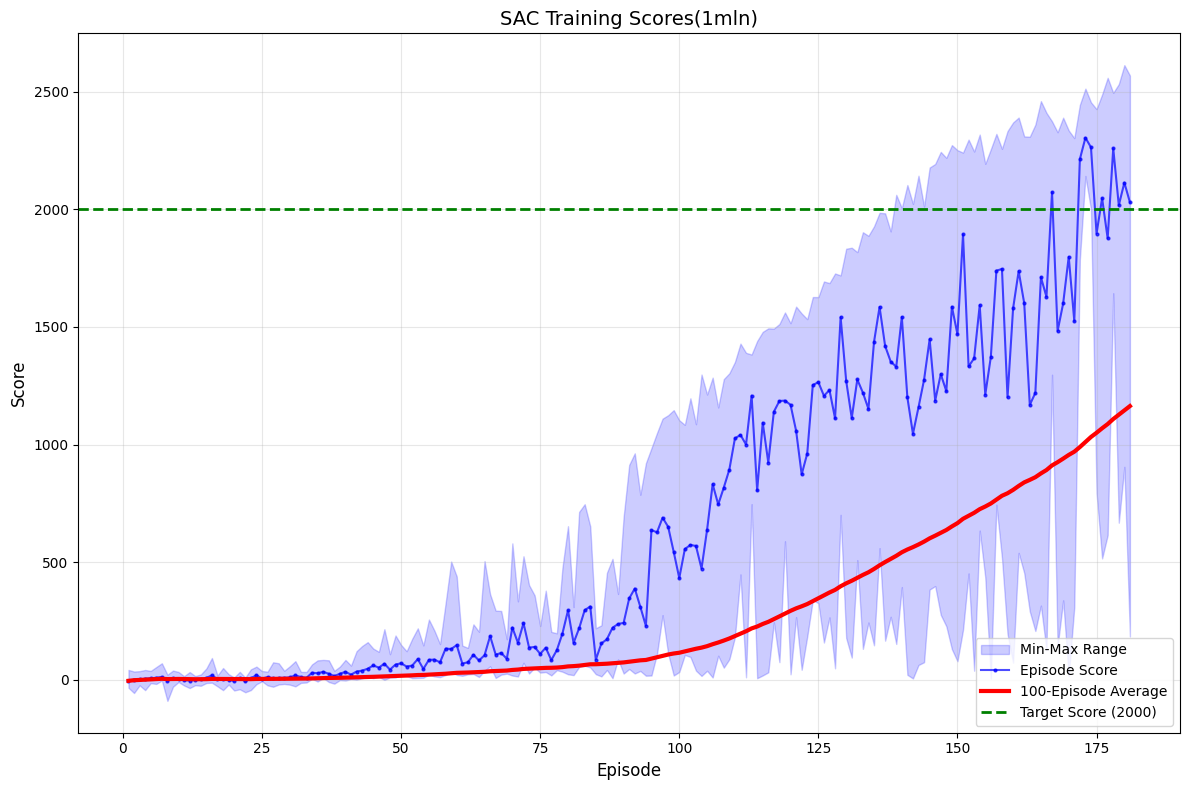

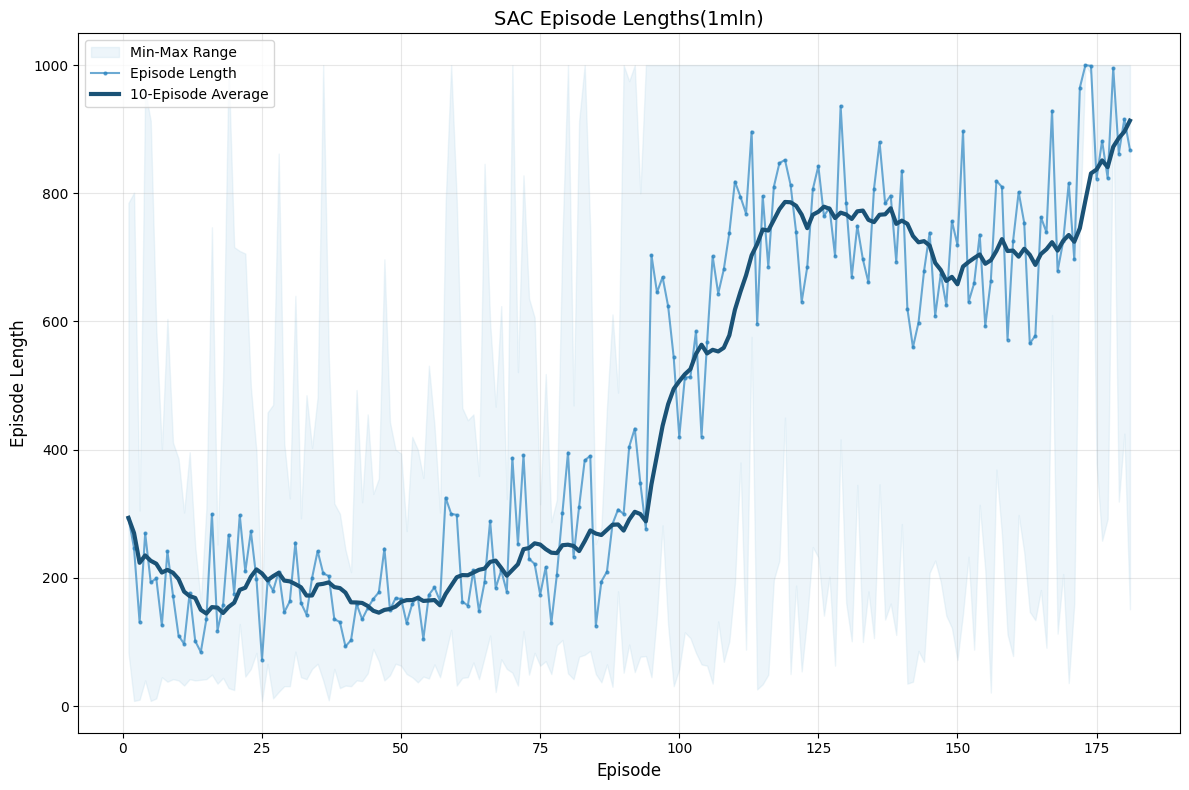

In [ ]:
reward_hist = np.load('./data/sac_crawler_rewards.npy')
survival_hist = np.load('./data/sac_crawler_lengths.npy')

fig = plot_scores(reward_hist, target_score=2000, window_size=100,
                  title='SAC Training Scores(1mln steps)')
fig = plot_episode_lengths(survival_hist, window_size=10,
                           title='SAC Episode Lengths(1mln steps)')

#### Comparison of TD3 and SAC

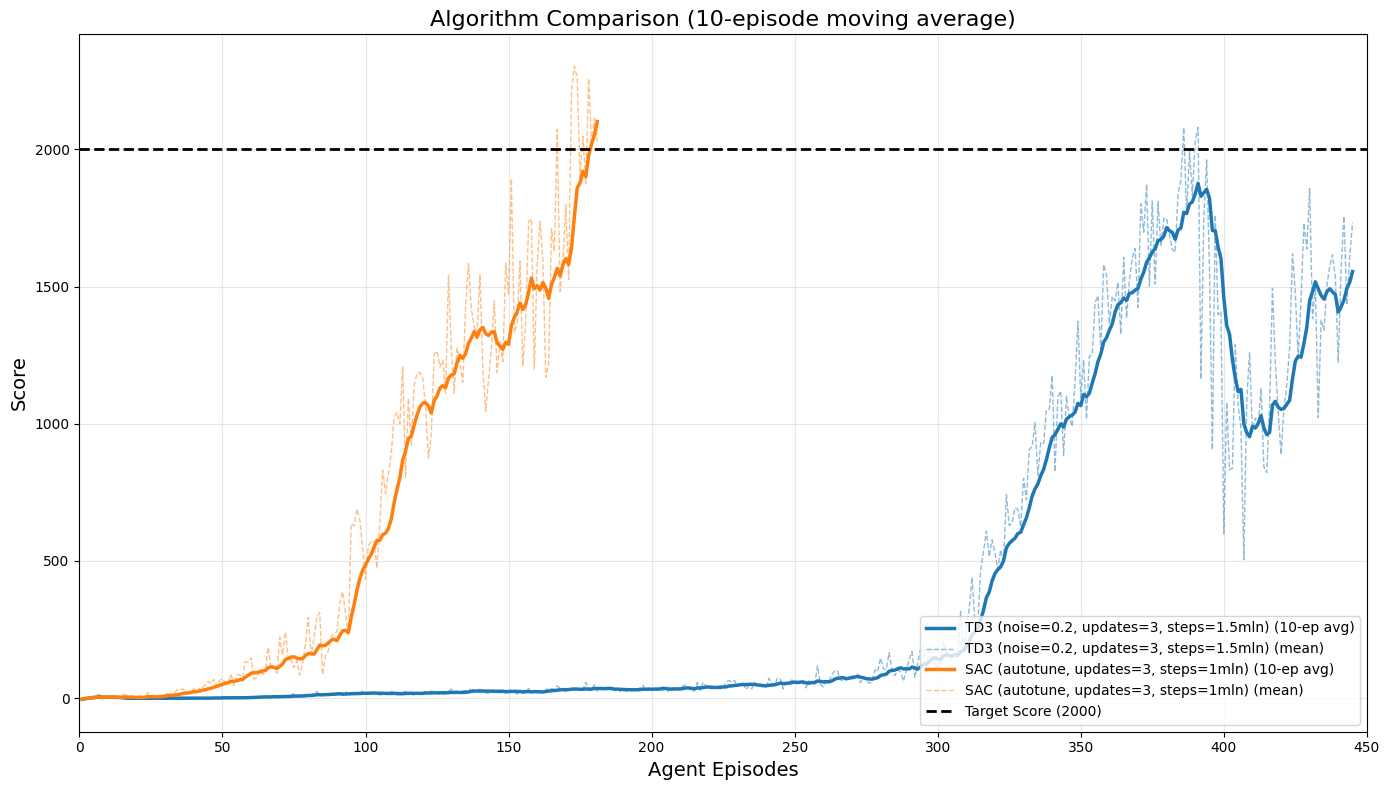

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils.plotting import plot_comparison

# Example usage
file_paths = [
    './data/td3_crawler_expl02_reward_1.5mln.npy',
    './data/sac_crawler_rewards.npy',
]

labels = [
    'TD3 (noise=0.2, updates=3, steps=1.5mln)',
    'SAC (autotune, updates=3, steps=1mln)',
]

colors = ['#1f77b4', '#ff7f0e', ]  # Nice color scheme

comparison_fig = plot_comparison(file_paths, labels, colors, target_score=2000, window_size=10)
plt.show()



#### Record The Results

In [1]:
from unityagents import UnityEnvironment
import numpy as np
%matplotlib inline

env = UnityEnvironment(file_name='./app/Crawler.app', worker_id=2)

brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)
# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))

Mono path[0] = '/Users/dmitrimanajev/Dev_Code/Udacity/Deep_Reinforcement2/control_reacher/app/Crawler.app/Contents/Resources/Data/Managed'
Mono config path = '/Users/dmitrimanajev/Dev_Code/Udacity/Deep_Reinforcement2/control_reacher/app/Crawler.app/Contents/MonoBleedingEdge/etc'


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: CrawlerBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 129
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 20
        Vector Action descriptions: , , , , , , , , , , , , , , , , , , , 


Number of agents: 12
Size of each action: 20
There are 12 agents. Each observes a state with length: 129


In [2]:
from rl_algo.sac_agent import Agent as SACAgent
from utils.recording import play_single_episode

sacAgent = SACAgent(state_size=state_size, action_size=action_size)
sacAgent.load('./models/sac_crawler_best.pth')

play_single_episode(sacAgent, env, brain_name=brain_name, max_steps=1000)

--------------------------------------------------
SAC Agent Parameters:
--------------------------------------------------
State Size:                 129
Action Size:                20
Random Seed:                None
--------------------------------------------------
Learning Parameters:
Buffer Size:                1000000
Batch Size:                 256
Gamma (Discount):           0.99
Tau (Soft Update):          0.005
Actor Learning Rate:        0.0003
Critic Learning Rate:       0.0003
Alpha:                      0.2
Automatic Entropy Tuning:   False
Skip Steps:                 1
Update Times:               1
Learning Starts:            10000 steps
--------------------------------------------------
Total score (averaged over agents): 1933.73
Environment closed successfully


array([1948.72817458, 1583.51225359, 2031.25408326, 1932.13887802,
       1995.12070661, 1994.85381528, 1985.01664408, 2015.16541639,
       2023.30070957, 1906.39615731, 1812.4390122 , 1976.84621972])

In [3]:
from utils.recording import convert_to_mp4, convert_to_gif_simple, convert_to_gif

mp4_file = convert_to_mp4("SAC_Crawler.mov", remove_original=False)
gif_file = convert_to_gif("SAC_Crawler.mov", fps=30, scale_factor=0.8)


Converting SAC_Crawler.mov to MP4...
Successfully converted to SAC_Crawler.mp4
Converting SAC_Crawler.mov to GIF...
Processed frame 0
Processed frame 150
Processed frame 300
Processed frame 450
Processed frame 600
Processed frame 750
Processed frame 900
Processed frame 1050
Processed frame 1200
Processed frame 1350
Processed frame 1500
Processed frame 1650
Processed frame 1800
Processed frame 1950
Processed frame 2100
Processed frame 2250
Processed frame 2400
Processed frame 2550
Processed frame 2700
Processed frame 2850
Processed frame 3000
Processed frame 3150
Writing GIF with 1084 frames...
Successfully saved to SAC_Crawler.gif


<img src="./assets/videos/SAC_Crawler.gif" width="600" alt="TD3 Reacher Agent" />


<video width="640" height="480" controls>
  <source src="./assets/videos/SAC_Crawler.mp4" type="video/mp4">
</video>